In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dataToVar as dat
from playsound import playsound

In [2]:

def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2



0.9987138299269578
0.001783387081181648 -0.12568814551147026 4.697092470876816
0.809000000001106


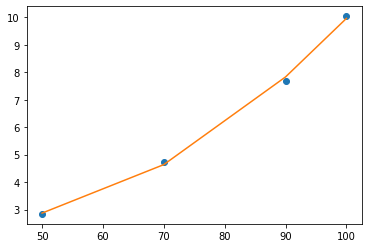

In [3]:
def r2surf(zlist,zlistfit):
    zlist = np.array(zlist)
    zlistfit = np.array(zlistfit)
    st = sum((zlist-np.average(zlist))**2)
    sr = sum((zlist-zlistfit)**2)
    r2 = 1-sr/st
    return r2

fif = dat.lid0Cons0_50
sev = dat.lid0Cons0_70
nin = dat.lid0Cons0_90
one = dat.lid0Cons0_100

# for i in range(len(one[1])):
#     if str(one[1][i])=='nan':
#         print(i)
# for i in range(len(one)):
#     if str(one[i]) == 'nan':
#         print(i)
# plt.plot(fif[0])
# plt.plot(sev[0])
# plt.plot(nin[0])
# plt.plot(one[0])

a = 50 - np.average(fif[2][-100:])
b = 70 - np.average(sev[2][-100:])
c = 90 - np.average(nin[2][-100:])
d = 100 - np.average(one[2][-100:])
xx = np.array([50,70,90,100])
yy = np.array([a,b,c,d])
aa,bb,cc = np.polyfit(xx,yy,2)
plt.plot(xx,yy,'o')
plt.plot(xx,aa*xx**2+bb*xx+cc)

;
print(r2(yy,aa*xx**2+bb*xx+cc))
print(aa,bb,cc)
# print(len(fif[2]))
print(fif[0][1])


In [4]:
therm = 58
off = aa*therm**2+bb*therm+cc
print(off)

3.406494172306605


In [5]:
rr = {}
# set = [50,70,90,100]

shortest = min(len(fif[1]),len(fif[2]),len(sev[1]),len(sev[2]),len(nin[1]),len(nin[2]),len(one[1]),len(one[2]))
ytot = [fif[2][:shortest],sev[2][:shortest],nin[2][:shortest],one[2][:shortest]]
xtot = [fif[1][:shortest],sev[1][:shortest],nin[1][:shortest],one[1][:shortest]]
# end = 600
# ytot = [fif[2][:end],sev[2][:end],nin[2][:end],one[2][:end]]
# xtot = [fif[1][:end],sev[1][:end],nin[1][:end],one[1][:end]]
zlist = []
for i in ytot:
    for j in i:
        zlist.append(j)

big = np.arange(0,1,0.1)
for i in big:
    zlistfit = []
    for j in range(len(ytot)):
        old = ytot[j][0]
        # ans = []
       

        for k in xtot[j]:
            if str(k) == 'nan':
                print('fix csv')
                break
            else:
                offset = aa*k**2+bb*k+cc
                old = old*i+(k-offset)*(1-i)
                zlistfit.append(old)
        

    r = r2surf(zlist,zlistfit)
    if r >0 and r<1:
        rr[r] = i

# print(rr)
print(max(rr)) 
   
trust = rr[max(rr)] 
print(trust)
trust = .99802

0.683537990600431
0.9


''

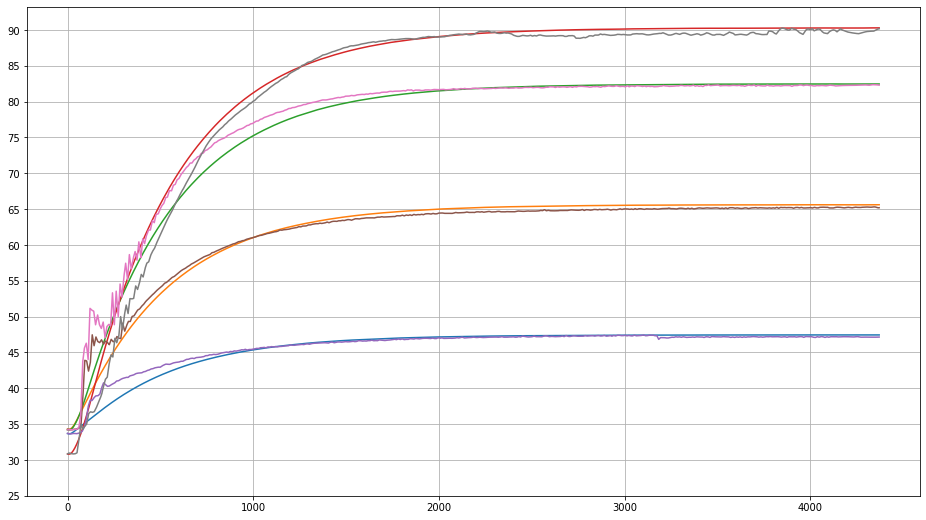

In [6]:
plt.figure(figsize=(16,9))
for j in range(len(ytot)):
    old = ytot[j][0]
    ans = []
 
    for k in xtot[j]:
        offset = aa*k**2+bb*k+cc
        old = old*trust+(k-offset)*(1-trust)
        ans.append(old)
    plt.plot(ans)

for i in ytot:
    plt.plot(i) 
plt.grid()
plt.yticks(np.arange(25,95,5))
;

In [7]:
# import required module


# for playing note.wav file
playsound('mixkit-doorbell-tone-2864.wav')
